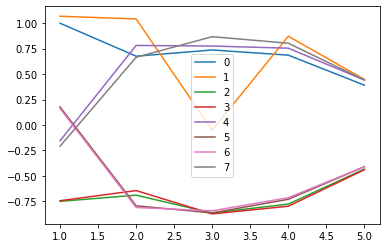

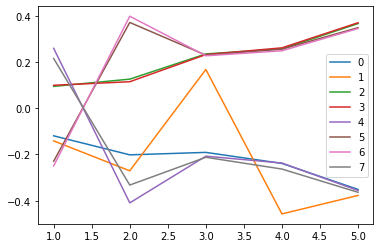

In [17]:
from matplotlib import pyplot as plt
import math
def find_numbers(s):
    s+=' '
    a,n=[],""
    for i in s:
        if i=='-':
            n='-'
        elif ord(i)>=48 and ord(i)<=57:
            n+=i
        elif i=='.':
            n+='.'
        elif len(n)>0 and n!='-':
#             print(n)
            a.append(float(n))
            n=""
    return a
a=find_numbers("""[ 0.99884593  0.6750188   0.73639894  0.68545413  0.39090502 -0.11924402
  -0.20156398 -0.19093268 -0.2387055  -0.35123426]
 [ 1.0673778   1.04056    -0.05137548  0.870726    0.44732195 -0.1412568
  -0.27060243  0.1678261  -0.45721468 -0.37717956]
 [-0.749711   -0.6890712  -0.8641878  -0.77659684 -0.43350112  0.09467135
   0.12602787  0.23519227  0.25697145  0.36656183]
 [-0.74363136 -0.6439357  -0.8731031  -0.7976629  -0.43920967  0.09946819
   0.11485562  0.23233978  0.2614828   0.3701148 ]
 [-0.15519387  0.7807068   0.7747302   0.75384367  0.4410922   0.25945836
  -0.40944612 -0.20740461 -0.23702087 -0.3559163 ]
 [ 0.17666765 -0.79365903 -0.86331695 -0.72954035 -0.40916803 -0.22906175
   0.37139145  0.2297679   0.25577083  0.34880924]
 [ 0.16156495 -0.8101268  -0.8427207  -0.7139421  -0.41049275 -0.24947807
   0.3982498   0.22722661  0.24870089  0.34513694]
 [-0.20831132  0.66464543  0.86672485  0.8024717   0.44174027  0.21539322
  -0.33229357 -0.21212249 -0.26305643 -0.363683  ]""")

list1=[]
plt.clf()
for i in range(len(a)//10):
    for j in range(i*10,i*10+5):
        if a[j]>=0.5*math.pi or a[j]<0:
            a[j]=a[j]-int(a[j]/(math.pi))*math.pi
    plt.plot([i for i in range(1,6)],a[i*10:i*10+5],label=i);
plt.legend()
plt.show()

plt.clf()
for i in range(len(a)//10):
    for j in range(i*10+5,i*10+10):
        a[j]=a[j]-int(a[j]/(math.pi))*math.pi
    plt.plot([i for i in range(1,6)],a[i*10+5:i*10+10],label=i);
plt.legend()
plt.show()

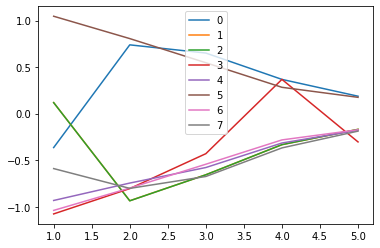

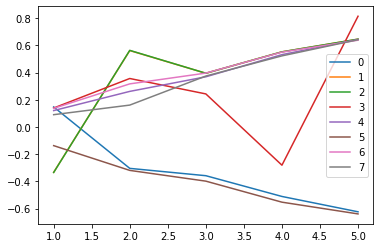

In [18]:
from matplotlib import pyplot as plt

def find_numbers(s):
    s+=' '
    a,n=[],""
    for i in s:
        if i=='-':
            n='-'
        elif ord(i)>=48 and ord(i)<=57:
            n+=i
        elif i=='.':
            n+='.'
        elif len(n)>0 and n!='-':
#             print(n)
            a.append(float(n))
            n=""
    return a
a=find_numbers("""[-0.36477804  0.73848027  0.6503063   0.3674067   0.18677099  0.14739221
  -0.30419135 -0.35810608 -0.5106516  -0.6235077 ]
 [ 0.11826435 -0.9361728  -0.6568418  -0.33363566 -0.16929883 -0.33307347
   0.56167424  0.39486778  0.55219865  0.6456107 ]
 [ 0.11783452 -0.9369396  -0.65716296 -0.33360013 -0.16927873 -0.33456185
   0.5632971   0.3950328   0.55245817  0.6458262 ]
 [-1.0775927  -0.805547   -0.43053892  0.3675169  -0.3043383   0.13931994
   0.35645404  0.24305111 -0.28080097  0.8140678 ]
 [-0.9330937  -0.74621826 -0.5791894  -0.3158536  -0.17872506  0.12058774
   0.26164094  0.36899072  0.5318862   0.643574  ]
 [ 1.0457855   0.80569756  0.54629457  0.28245375  0.17482233 -0.13705982
  -0.31910184 -0.39812383 -0.5526691  -0.6390095 ]
 [-1.0398599  -0.79988486 -0.5438217  -0.2825978  -0.17367308  0.1369321
   0.31690243  0.39616698  0.5503209   0.6380235 ]
 [-0.5906196  -0.8033274  -0.67541337 -0.36855417 -0.18817595  0.09052686
   0.16094014  0.37449613  0.522721    0.6415645 ]""")

list1=[]
plt.clf()
for i in range(len(a)//10):
    plt.plot([i for i in range(1,6)],a[i*10:i*10+5],label=i);
plt.legend()
plt.show()

plt.clf()
for i in range(len(a)//10):
    plt.plot([i for i in range(1,6)],a[i*10+5:i*10+10],label=i);
plt.legend()
plt.show()

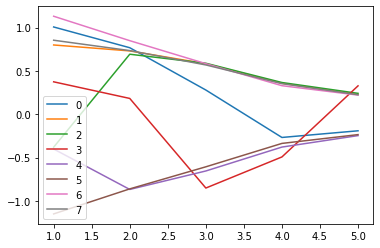

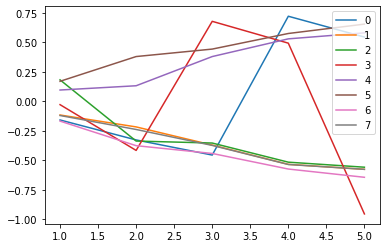

In [31]:
from matplotlib import pyplot as plt

def find_numbers(s):
    s+=' '
    a,n=[],""
    for i in s:
        if i=='-':
            n='-'
        elif ord(i)>=48 and ord(i)<=57:
            n+=i
        elif i=='.':
            n+='.'
        elif len(n)>0 and n!='-':
#             print(n)
            a.append(float(n))
            n=""
    return a
a=find_numbers("""1.0072813   0.7679644   0.27988875 -0.2672753  -0.19041407 -0.15817805
  -0.32742545 -0.4556489   0.7209438   0.5445063 ]
 [ 0.7996708   0.7311463   0.58346856  0.3580796   0.23027578 -0.11599756
  -0.21697447 -0.37077624 -0.5342222  -0.57643497]
 [-0.37933612  0.69296646  0.5888483   0.36661023  0.24174243  0.18184079
  -0.33691552 -0.3536939  -0.51582485 -0.55851793]
 [ 0.37454835  0.18290405 -0.850797   -0.49198312  0.3280698  -0.02839916
  -0.4162474   0.67781466  0.49280915 -0.95440465]
 [-0.4005417  -0.8670566  -0.6539809  -0.37815672 -0.24590147  0.09565344
   0.13184613  0.3792405   0.5292926   0.5801854 ]
 [-1.1494011  -0.8606602  -0.60588795 -0.3359373  -0.2345544   0.16956453
   0.37932858  0.44257775  0.5747618   0.654273  ]
 [ 1.131137    0.8493505   0.58400285  0.32988548  0.22137535 -0.16776718
  -0.37600565 -0.44203255 -0.5740429  -0.6439556 ]
 [ 0.85446453  0.7348681   0.5692702   0.35328004  0.22548401 -0.1203419
  -0.2387156  -0.37378493 -0.5355541  -0.5766697 ]""")

list1=[]
plt.clf()
for i in range(len(a)//10):
    plt.plot([i for i in range(1,6)],a[i*10:i*10+5],label=i);
plt.legend()
plt.show()

plt.clf()
for i in range(len(a)//10):
    plt.plot([i for i in range(1,6)],a[i*10+5:i*10+10],label=i);
plt.legend()
plt.show()

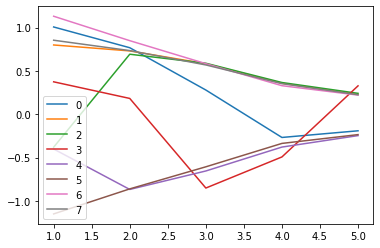

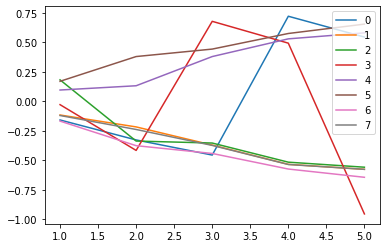

In [20]:
from matplotlib import pyplot as plt

def find_numbers(s):
    s+=' '
    a,n=[],""
    for i in s:
        if i=='-':
            n='-'
        elif ord(i)>=48 and ord(i)<=57:
            n+=i
        elif i=='.':
            n+='.'
        elif len(n)>0 and n!='-':
#             print(n)
            a.append(float(n))
            n=""
    return a
a=find_numbers(""" 1.0072813   0.7679644   0.27988875 -0.2672753  -0.19041407 -0.15817805
  -0.32742545 -0.4556489   0.7209438   0.5445063 ]
 [ 0.7996708   0.7311463   0.58346856  0.3580796   0.23027578 -0.11599756
  -0.21697447 -0.37077624 -0.5342222  -0.57643497]
 [-0.37933612  0.69296646  0.5888483   0.36661023  0.24174243  0.18184079
  -0.33691552 -0.3536939  -0.51582485 -0.55851793]
 [ 0.37454835  0.18290405 -0.850797   -0.49198312  0.3280698  -0.02839916
  -0.4162474   0.67781466  0.49280915 -0.95440465]
 [-0.4005417  -0.8670566  -0.6539809  -0.37815672 -0.24590147  0.09565344
   0.13184613  0.3792405   0.5292926   0.5801854 ]
 [-1.1494011  -0.8606602  -0.60588795 -0.3359373  -0.2345544   0.16956453
   0.37932858  0.44257775  0.5747618   0.654273  ]
 [ 1.131137    0.8493505   0.58400285  0.32988548  0.22137535 -0.16776718
  -0.37600565 -0.44203255 -0.5740429  -0.6439556 ]
 [ 0.85446453  0.7348681   0.5692702   0.35328004  0.22548401 -0.1203419
  -0.2387156  -0.37378493 -0.5355541  -0.5766697 ]""")

list1=[]
plt.clf()
for i in range(len(a)//10):
    plt.plot([i for i in range(1,6)],a[i*10:i*10+5],label=i);
plt.legend()
plt.show()

plt.clf()
for i in range(len(a)//10):
    plt.plot([i for i in range(1,6)],a[i*10+5:i*10+10],label=i);
plt.legend()
plt.show()

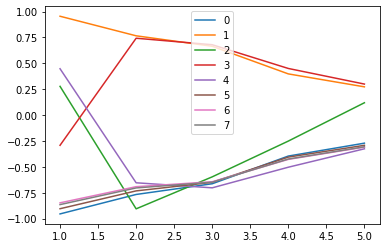

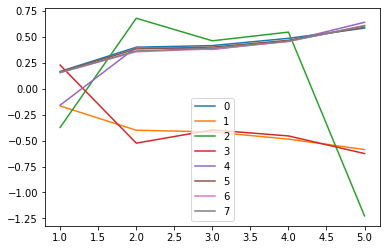

In [21]:
from matplotlib import pyplot as plt

def find_numbers(s):
    s+=' '
    a,n=[],""
    for i in s:
        if i=='-':
            n='-'
        elif ord(i)>=48 and ord(i)<=57:
            n+=i
        elif i=='.':
            n+='.'
        elif len(n)>0 and n!='-':
#             print(n)
            a.append(float(n))
            n=""
    return a
a=find_numbers(""" [-0.95535034 -0.76728773 -0.6637591  -0.39604905 -0.27145815  0.16668823
   0.40051052  0.4162721   0.4862409   0.58464164]
 [ 0.9554207   0.76635796  0.66517574  0.39814255  0.2730253  -0.1658222
  -0.3999911  -0.41601244 -0.48576272 -0.5860692 ]
 [ 0.27774906 -0.90629727 -0.59706867 -0.25129163  0.11922842 -0.37288672
   0.6796924   0.4622342   0.5459441  -1.2261391 ]
 [-0.29210472  0.7428876   0.68015987  0.450628    0.29976344  0.22771767
  -0.52445954 -0.3969864  -0.45499483 -0.6248447 ]
 [ 0.44798744 -0.65443295 -0.70312345 -0.50389475 -0.3260116  -0.15769498
   0.39876288  0.37862533  0.4605667   0.6406799 ]
 [-0.9051459  -0.7327386  -0.6501793  -0.4060599  -0.2922197   0.16213976
   0.38391724  0.40195978  0.4670796   0.5937025 ]
 [-0.848244   -0.6920033  -0.644342   -0.42830062 -0.30963406  0.15643221
   0.35630697  0.38412866  0.45537323  0.6101675 ]
 [-0.865276   -0.7041569  -0.64861995 -0.42461205 -0.30640528  0.15619539
   0.36397946  0.3895416   0.4583409   0.6068902 ]""")

list1=[]
plt.clf()
for i in range(len(a)//10):
    plt.plot([i for i in range(1,6)],a[i*10:i*10+5],label=i);
plt.legend()
plt.show()

plt.clf()
for i in range(len(a)//10):
    plt.plot([i for i in range(1,6)],a[i*10+5:i*10+10],label=i);
plt.legend()
plt.show()

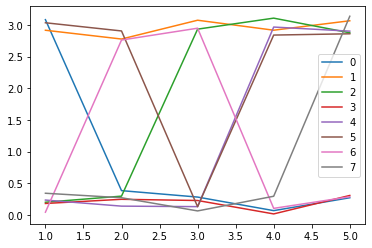

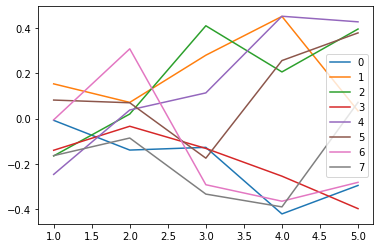

In [30]:
from matplotlib import pyplot as plt
import math
def find_numbers(s):
    s+=' '
    a,n=[],""
    for i in s:
        if i=='-':
            n='-'
        elif ord(i)>=48 and ord(i)<=57:
            n+=i
        elif i=='.':
            n+='.'
        elif len(n)>0 and n!='-':
#             print(n)
            a.append(float(n))
            n=""
    return a
a=find_numbers("""[-0.05758173  0.38158816  0.28003865  0.06561476  0.26928768 -0.00766084
  -0.13881949 -0.12683816 -0.42048898 -0.29489833]
 [-0.22490738 -0.36378372 -0.06650991 -0.22409512 -0.07506918  0.1533053
   0.07148161  0.27968925  0.45086583  0.03377662]
 [ 0.19827674  0.29473153 -0.20734975 -0.03348777 -0.265032   -0.16458365
   0.02021956  0.409558    0.20589839  0.39516002]
 [ 0.17861715  0.24478701  0.22566892  0.01366769  0.30540904 -0.13966262
  -0.03374141 -0.13151659 -0.2539453  -0.39722553]
 [ 0.2326164   0.1366014   0.1287726  -0.17436942 -0.23913264 -0.24615052
   0.03806726  0.11345293  0.4515938   0.4269222 ]
 [-0.10666739 -0.23604994  0.12794033 -0.30108684 -0.28076768  0.08181852
   0.06988406 -0.1745404   0.25607374  0.37809145]
 [ 0.04086343 -0.37938517 -0.19254838  0.10146808  0.2848035  -0.00538657
   0.30783522 -0.29169548 -0.36450362 -0.28114346]
 [ 0.34037796  0.269469    0.06097415  0.29295766 -0.00352561 -0.16338618
  -0.08567329 -0.33305833 -0.38947657  0.07194282]""")

list1=[]
plt.clf()
for i in range(len(a)//10):
    for j in range(i*10,i*10+5):
        if a[j]>=math.pi :
            a[j]=a[j]-(a[j]//(math.pi))*math.pi
        elif a[j]<0:
            a[j]=a[j]+(abs(a[j])//(math.pi)+1)*math.pi
    plt.plot([i for i in range(1,6)],a[i*10:i*10+5],label=i);
plt.legend()
plt.show()

plt.clf()
for i in range(len(a)//10):
    for j in range(i*10+5,i*10+10):
        a[j]=a[j]-int(a[j]/(math.pi))*math.pi
    plt.plot([i for i in range(1,6)],a[i*10+5:i*10+10],label=i);
plt.legend()
plt.show()

-2.0